In [32]:
#importing the libraries
import numpy as np
import pandas as pd
import tensorflow as tf

In [54]:
trainX = np.load("trainX.npy")
trainY = np.load("trainY.npy")
testX = np.load("testX.npy")
testY = np.load("testY.npy")
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

# one hot encoding
trainY = tf.keras.utils.to_categorical(trainY, num_classes=20)
testY = tf.keras.utils.to_categorical(testY, num_classes=20)

(240, 10304)
(240,)
(160, 10304)
(160,)


In [55]:
#Reshaping the data
trainX=trainX.reshape(240,112,92,1)
testX=testX.reshape(160,112,92,1)

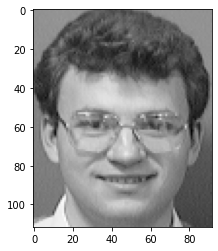

In [56]:
tf.keras.preprocessing.image.array_to_img(trainX[61])

import matplotlib.pyplot as plt
trainX=trainX.reshape(240,112,92)
plt.imshow(trainX[61],cmap='gray')

In [36]:
# building the CNN model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((112,92,1),input_shape=(112,92,1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))

In [37]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(20, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_4 (Reshape)         (None, 112, 92, 1)        0         
                                                                 
 batch_normalization_4 (Batc  (None, 112, 92, 1)       4         
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 110, 90, 32)       320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 55, 45, 32)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 55, 45, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 53, 43, 64)       

## Train the model

In [39]:
history=model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=20,
          batch_size=16)

Epoch 1/20
15/15 [==============================] - 1s 41ms/step - loss: 3.1468 - accuracy: 0.1042 - val_loss: 2.9921 - val_accuracy: 0.0500
Epoch 2/20
15/15 [==============================] - 0s 25ms/step - loss: 2.2465 - accuracy: 0.4167 - val_loss: 13.3806 - val_accuracy: 0.0500
Epoch 3/20
15/15 [==============================] - 0s 24ms/step - loss: 0.5641 - accuracy: 0.8208 - val_loss: 37.4605 - val_accuracy: 0.0500
Epoch 4/20
15/15 [==============================] - 0s 24ms/step - loss: 0.2829 - accuracy: 0.8958 - val_loss: 25.4801 - val_accuracy: 0.0500
Epoch 5/20
15/15 [==============================] - 0s 23ms/step - loss: 0.2307 - accuracy: 0.9208 - val_loss: 16.7131 - val_accuracy: 0.0500
Epoch 6/20
15/15 [==============================] - 0s 29ms/step - loss: 0.1051 - accuracy: 0.9667 - val_loss: 22.0156 - val_accuracy: 0.0500
Epoch 7/20
15/15 [==============================] - 0s 23ms/step - loss: 0.0226 - accuracy: 0.9958 - val_loss: 8.4391 - val_accuracy: 0.1187
Epoch 8/

## Plot the model

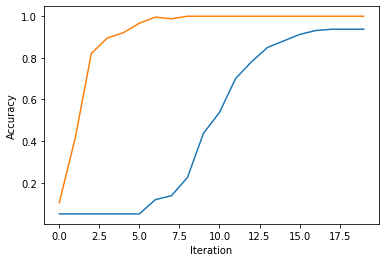

In [40]:
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.show()

In [78]:
##The accuracy is 93.75%. We will now apply Transfer Learning for better results. 

## Transfer Learning

In [57]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(240, 112, 92)
(240, 20)
(160, 112, 92, 1)
(160, 20)


In [58]:
trainX = trainX.reshape(240,112,92)
testX = testX.reshape(160,112,92)

In [59]:
#to increase the dimension of the array by one more dimension
trainX = np.repeat(trainX[..., np.newaxis], 3, -1)
testX = np.repeat(testX[..., np.newaxis], 3, -1)

In [60]:
print(trainX.shape)
print(testX.shape)

(240, 112, 92, 3)
(160, 112, 92, 3)


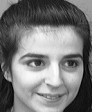

In [67]:
tf.keras.preprocessing.image.array_to_img(trainX[110])

In [68]:
#Load the pre-trained model
model = tf.keras.applications.resnet50.ResNet50(include_top=False, #Do not include FC layer at the end
                                          input_shape=(112,92,3),
                                          weights='imagenet')

94781440/94765736 [==============================] - 2s 0us/step


In [69]:
#Set pre-trained model layers to not trainable
for layer in model.layers:
    layer.trainable = False

In [70]:
model.output

<KerasTensor: shape=(None, 4, 3, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

In [71]:
## Add FC layers

#get Output layer of Pretrained model
x = model.output

#Flatten the output to feed to Dense layer
x = tf.keras.layers.Flatten()(x)

#Add one Dense layer
x = tf.keras.layers.Dense(200, activation='relu')(x)

#Add output layer
prediction = tf.keras.layers.Dense(20,activation='softmax')(x)

##Building final model for Classification

In [72]:
#Using Keras Model class
final_model = tf.keras.models.Model(inputs=model.input, #Pre-trained model input as input layer
                                    outputs=prediction) #Output layer added

In [73]:
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [74]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 112, 92, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 118, 98, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 56, 46, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 56, 46, 64)   256         ['conv1_conv[0][0]']         

## Train the model

In [75]:
final_model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=20,
          batch_size=16)

Epoch 1/20
15/15 [==============================] - 6s 161ms/step - loss: 9.0998 - accuracy: 0.3833 - val_loss: 1.8193 - val_accuracy: 0.6687
Epoch 2/20
15/15 [==============================] - 1s 74ms/step - loss: 0.4025 - accuracy: 0.8833 - val_loss: 0.2863 - val_accuracy: 0.9062
Epoch 3/20
15/15 [==============================] - 1s 72ms/step - loss: 0.0455 - accuracy: 0.9875 - val_loss: 0.1624 - val_accuracy: 0.9438
Epoch 4/20
15/15 [==============================] - 1s 73ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.2377 - val_accuracy: 0.9312
Epoch 5/20
15/15 [==============================] - 1s 73ms/step - loss: 0.0064 - accuracy: 0.9958 - val_loss: 0.1453 - val_accuracy: 0.9563
Epoch 6/20
15/15 [==============================] - 1s 73ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.1298 - val_accuracy: 0.9625
Epoch 7/20
15/15 [==============================] - 1s 90ms/step - loss: 6.6014e-04 - accuracy: 1.0000 - val_loss: 0.1199 - val_accuracy: 0.9625
Epoch 8/

In [76]:
## We achieved a better accuracy of 96.88%